<table style="width:100%; background-color:#FFFFFF" align="left">
 <tr>
   <td style="text-align:left; background-color:#FFFFFF">
       <p>Prof. Dr. Stefan Decker <br>
        M. Slupczynski, L. Neumann, M. Kißgen</p>
        <p><strong>2024-06-24</strong></p>
     </td>
   <td style="text-align:right; background-color:#FFFFFF">
     <div>
       <img src="https://git.rwth-aachen.de/i5/teaching/dbis-raw/-/raw/main/dbis-logo.png" width="500"/>
     </div>
    </td>
 </tr>
</table>
<div class="clearfix"></div>
<center>
    <h1>Datenbanken und Informationssysteme (SoSe 2024) </h1>
    <h1>Übung 9 - SPARQL und RDFs</h1>
</center>

<center>
    <h4>Abgabe bis 2024-07-04 12:15</h4>
    <strong>Zu spät eingereichte Übungen werden nicht berücksichtigt.</strong>
</center>

<div class="hidden-print"><hr />
<h3> Wichtige Hinweise</h3>
<ul>
<li>Bei Nichtbeachtung dieser Hinweise wird die Abgabe mit 0 Punkten bewertet!</li>
<li>Bitte laden Sie Ihre digitalen Lösungen mit diesem Notebook ins Moodle hoch.</li>
<li>Bitte geben Sie Namen, Matrikelnummern auf der schriftlichen Lösung an.</li>
</ul></div>

<strong>Die Lösung zu diesem Übungsblatt wird in den Übungen am 01. Juli und 05. Juni vorgestellt. <br /> 
Bitte beachten Sie auch die aktuellen Ankündigungen im Moodle-Lernraum zur Vorlesung. </strong> <br />
<em>* bezeichnet Bonusaufgaben.</em>
<hr />

<h3>Abgabegruppe</h3>
Es ist möglich die Abgabe in Gruppen von bis zu fünf Personen zu bearbeiten. <strong>Jeder Gruppenteilnehmer muss für sich ein Notebook hochladen</strong>. Wenn Sie in einer Abgabegruppe arbeiten, dürfen die Notebooks der Gruppenteilnehmer den gleichen Inhalt aufweisen. Wenn Sie in einer Gruppe arbeiten, tragen Sie hier bitte alle Gruppenteilnehmer inklusive sich selbst ein. <strong>Eine inkonsistente Angabe von Gruppenmitgliedern bei den Teilnehmern führt im Zweifel zu 0 Punkten für alle Gruppenteilnehmer!</strong> Es ist möglich zwischen den Abgaben die Gruppen zu wechseln.

<h4>Gruppenteilnehmer</h4>
<ul>
    <li>Florian Assmuth, 449348</li>
    <li>Elisona Agalliu, 430455</li>
    <li>Beren Kapanci, 424273</li>
    <li>Erik Fedrau, 433793</li>
</ul>

<div class="alert alert-info hidden-print">Die folgende Codezelle sollte zu Beginn der Bearbeitung der Übung ausgeführt werden. <br /> Am Ende sollte <b>"OK, es kann los gehen!"</b> stehen. Dies kann ein paar Minuten dauern.</div>

In [4]:
%pip install -q jupyter-rdfify -U
%pip install -q requests -U
%pip install -q chardet -U
%pip install -q charset_normalizer -U
%pip install -q dbis-exc-manager
%reload_ext jupyter-rdfify

try:
# import libraries
    from excmanager.Task import Exercise, Task, SubTask
    from excmanager.scorer import SetScorer
    from IPython.display import display, HTML
    import warnings
    # initialize task structure
    exc = Exercise(9)
    task1 = Task( exc, "9.1" )
    task2 = Task( exc, "9.2" )    
    task3 = Task( exc, "9.3" )    
    task4 = Task( exc, "9.4" )
except Exception as e:
    display(HTML(f"<div class='alert alert-danger'><h2> Etwas ist beim import schief gelaufen:</h1>{e}</div>"))
else:
    display(HTML("<div class='alert alert-success'><h1> OK, es kann los gehen!</h1></div>"))


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/Users/florian/Development/DBIS/venv/lib/python3.11/site-packages/rdflib_jsonld/__init__.py:9: DeprecationWarning: The rdflib-jsonld package has been integrated into rdflib as of rdflib==6.0.0.  Please remove rdflib-jsonld from your project's dependencies.
  warnings.warn(


<div class="alert alert-info">
<b>Wichtig</b><br>
Bitte validieren Sie die Serialisierung Ihrer RDF Graphen mit dem Validator auf dieser Seite: <a href="http://ttl.summerofcode.be">Turtle Validator</a>. Dort müssen Sie lediglich Ihre Serialisierung einfügen und auf 'Validate!' klicken. Evtl. Fehler werden dann sichtbar. Syntaktisch inkorrekte Lösungen werden mit 0 Punkten bewertet. Beachten Sie auch mögliche Fehlermeldungen der entsprechenden Zellen in diesem Notebook.
</div>

<div class="pull-left">
    <br>
    <h2> Aufgabe 9.1 (RDF Datenmodell 1)</h2>
</div>

<div class="pull-right">
    <h3> (5 Punkte) </h3>
</div>

## Tutorial

### Die Basics

Um ein RDF Triple (Subjekt, Prädikat, Objekt) zu serialisieren, müssen Sie lediglich <b>Subject Predicate Object .</b> niederschreiben. Beachten Sie den Punkt!

In Turtle sind die URIs (z.B. http://example.org/#Germany) mit gewinkelten Klammern (Angled Brackets) umklammert (&lt;http://example.org/#Germany&gt;). Das RDF Triple (http://example.org/#Germany, http://example.org/#capital, http://example.org/#Berlin) wird somit wie folgt serialisiert:

**&lt;http://example.org/#Germany&gt; &lt;http://example.org/#capital&gt; &lt;http://example.org/#Berlin&gt; .**


### CURIEs
Das obere Triple könnte man noch weiter vereinfachen, da alle URIs mit http://example.org/# beginnen. Man kann sog. prefixes definieren um die Triple lesbarer zu machen. Diese abgekürzten URIs werden *Kompakte URIs* oder *CURIES* genannt. In Turtle wird ein solches Präfix mit dem Schlüsselwort **@prefix** definiert, gefolgt von der Abkürzung, dann dem URI-Präfix in eckigen Klammern (&lt; &gt;) und schließlich einem Punkt. Wenn wir z. B. *http://example.org/#* mit *ex:* abkürzen wollen, müssen wir die folgende Zeile dem Turtle-Dokument voranstellen:

**@prefix ex: &lt;http://example.org/#&gt; .**

Nun können wir das RDF-Tripel abkürzen:

**&lt;http://example.org/#Germany&gt; &lt;http://example.org/#capital&gt; &lt;http://example.org/#Berlin&gt; .**

zu:

**ex:Germany ex:capital ex:Berlin .**

Beachten Sie, dass wir bei der Verwendung von CURIEs die gewinkelten Klammern weglassen.

### Literale

Für grundlegende Werte wie Zahlen und Zeichenketten ist es unpraktisch, URIs zu verwenden. Anstelle von URIs verwenden wir Literale. Literale haben einen Datentyp, der standardmäßig 'String' ist. Literale können nur in der Objektposition von Triples verwendet werden und werden in doppelte Anführungszeichen (" ") eingeschlossen. Ein Beispiel für ein Tripel mit einem String-Literal wäre:

**ex:Germany ex:name "Deutschland" .**

Um einen *Datentyp* anzugeben, wird er mit *zwei Carets* (^^) an das Literal angehängt. Ein Datentyp kann ein beliebiger URI sein, aber es gibt einige vordefinierte Datentypen, die in den meisten Fällen ausreichen sollten. Diese vordefinierten Datentypen verwenden das Präfix *http://www.w3.org/2001/XMLSchema#*, das normalerweise mit *xsd:* abgekürzt wird. Ein Beispiel für ein Integer-Literal wäre:

**ex:Germany ex:population "83042235"^^xsd:int .**

### Sprach-Tag

Es gibt auch String-Literale mit einer bestimmten Sprache. Dies ist nützlich für Namen, die sich in verschiedenen Sprachen unterscheiden. Um eine Sprache anzugeben, hängen wir ein zweistelliges Sprach-Tag mit einem at-Symbol (@) hinter dem Literal an. Das Literal wird dann automatisch als String mit Sprach-Tag interpretiert (dieser Datentyp wird nie explizit angegeben). Um auszudrücken, dass ex:germany im Englischen und im Deutschen einen anderen Namen hat, würde man zwei Tripel hinzufügen:


**ex:Germany ex:name "Deutschland"@de .**
**ex:Germany ex:name "Germany"@en .**


<div class="row"><div class="pull-left"><h2>Teilaufgabe 9.1 a)</h2></div><div class="pull-right"><h3>(2 Punkte)</h3></div></div>

### Gegeben sind die folgenden Informationen:
*  `<http://example.org/lotr>` ist ein Buch
* Dieses Buch hat den Namen "Der Herr der Ringe" auf Deutsch und "The Lord of the Rings" auf Englisch.
* Das Jahr der Erstveröffentlichung des Buchs ist 1954 (die Jahreszahl ist ein Literal mit integer-Datentyp).
* Das Buch gehört zum Genre (`http://example.org/genre`) der Fantasy-Literatur (`<http://example.org/fantasy>`).
* Die Seitenanzahl des Buches ist 1178 Seiten (die Seitenanzahl ist ein Literal mit integer-Datentyp).
* `<http://example.org/tolkien>` ist ein Autor, der das oben beschriebene Buch geschrieben hat.


<b> Modellieren Sie die o.g. Informationen mit dem folgenden Vokabular: </b> 

* Buch: <http://example.org/Buch>
* Name: <http://example.org/name>
* Erstveröffentlichung: <http://example.org/erstveröffentlichung>
* Genre: <http://example.org/genre>
* Fantasy: <http://example.org/fantasy>
* Seitenzahl: <http://example.org/seitenzahl>
* Autor: <http://example.org/Autor>
* HatGeschrieben: <http://example.org/hatGeschrieben>
* integer: <http://www.w3.org/2001/XMLSchema#int>
* ist ein / a: <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>

<b> Beachten Sie, dass Sie für die Lösung dieser Aufgabe nur dieses Vokabular brauchen. </b> <br> 
<b>Die Benutzung von CURIEs ist nicht zulässig!</b>

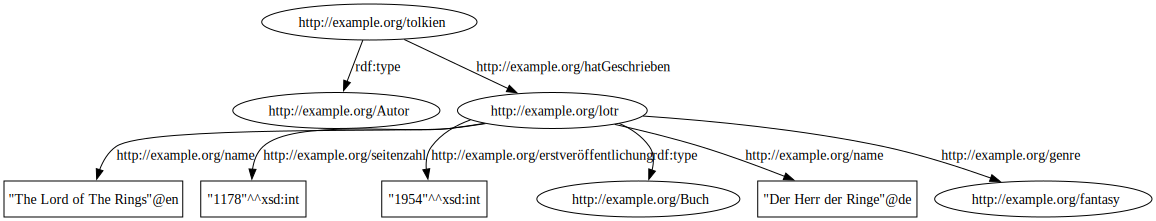

In [5]:
%%rdf turtle -l buch
# IHR CODE HIER
<http://example.org/lotr> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://example.org/Buch> .
<http://example.org/lotr> <http://example.org/name> "Der Herr der Ringe"@de .
<http://example.org/lotr> <http://example.org/name> "The Lord of The Rings"@en .
<http://example.org/lotr> <http://example.org/erstveröffentlichung> "1954"^^<http://www.w3.org/2001/XMLSchema#int> .
<http://example.org/lotr> <http://example.org/genre> <http://example.org/fantasy> .
<http://example.org/lotr> <http://example.org/seitenzahl> "1178"^^<http://www.w3.org/2001/XMLSchema#int> .
<http://example.org/tolkien> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://example.org/Autor> .
<http://example.org/tolkien> <http://example.org/hatGeschrieben> <http://example.org/lotr> .


In [6]:
store = %rdf -r
num_triples = len(store["rdfgraphs"]["buch"])
if num_triples != 8:
    warnings.warn(f"Der Graph soll 8 Triple beinhalten, beinhaltet {num_triples}")


In [7]:
# Autograder check

## Tutorial (Fortsetzung)

### Blank Nodes

Manchmal haben Ressourcen keinen Identifier oder sollten keinen haben. Dennoch stehen diese aber in Beziehung zu anderen Ressourcen. Diese anonymen Ressourcen werden in RDF-Graphen durch leere Knoten dargestellt. In Turtle werden leere Knoten mit einem Unterstrich gefolgt von einem Doppelpunkt und einem Identifier (\_:identifier) dargestellt. Der Zweck des Identifiers ist es, die anonyme Ressource mehrfach lokal referenzieren zu können. Selbst wenn zwei leere Knoten in verschiedenen Graphen denselben Identifier verwenden, verweisen sie normalerweise auf eine andere Ressource.

Wenn Sie z. B. ausdrücken wollen, dass Sie jemanden kennen, der Professor ist, aber keinen Identifier hat, und dass es noch jemanden gibt, den Sie nicht kennen, der aber auch Professor ist, würden Sie es wie folgt modellieren:

**Hinweis:** Im RDF-Datenmodell sind `rdf:type` und `a` funktional gleichwertig. Beide dienen dazu, den Typ einer Ressource zu spezifizieren. `a` ist lediglich eine Abkürzung für `rdf:type` in der kompakten Turtle-Syntax. Daher kann man sie in RDF-Dokumenten austauschbar verwenden, ohne dass sich die Bedeutung ändert.


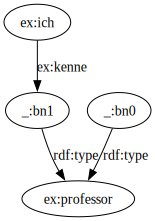

In [8]:
%%rdf turtle -l kennt
@prefix ex: <http://example.org/#> .

ex:ich ex:kenne _:1 .
_:1 a ex:professor .
_:2 a ex:professor .

Sie kennen \_:1, aber nicht \_:2, aber sie sind beide Professoren und haben keinen Identifier und werden durch jeweils ein Blank Node modelliert.

Zusätzlich werden häufig leere Knoten verwendet, um n-arige Beziehungen darzustellen. So kann z. B. eine Benotung, die eine Note und einen Bewertenden haben muss, wie folgt ausgedrückt werden:

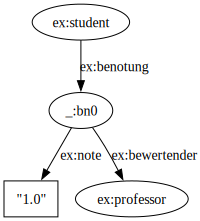

In [9]:
%%rdf turtle -l bewertung
@prefix ex: <http://example.org/#> .

ex:student ex:benotung _:1 .
_:1 ex:note "1.0" .
_:1 ex:bewertender ex:professor .

Diese n-arige Beziehung hat somit Ähnlichkeiten zum zusammengesetzten Attribut, was Sie im Rahmen der ER-Modellierung kennengelernt haben.

Um dies lesbarer zu machen, können Sie stattdessen eckige Klammern (\[ \]) verwenden. Jede Prädikat-Objekt-Kombination zwischen den eckigen Klammern hat dann den gleichen, unbenannten, Blank Node als Subjekt. Das Notenbeispiel würde dann wie folgt aussehen:

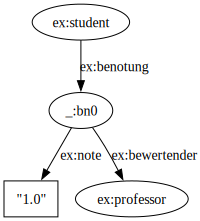

In [10]:
%%rdf turtle -l gradingShort
@prefix ex: <http://example.org/#> .

ex:student ex:benotung [
ex:note "1.0" ;
ex:bewertender ex:professor
] .

Beachten Sie, dass wir zwischen den Klammern Semikolons und Kommas verwenden müssen und nach den Klammern noch ein Punkt steht. Diese Blank Nodes nennt man auch "nested" Blank Node, welche in der Regel keine Identifier haben.

<div class="row"><div class="pull-left"><h2>Teilaufgabe 9.1 b)</h2></div><div class="pull-right"><h3>(3 Punkte)</h3></div></div>

### Erstellen Sie mit Turtle und Blank-Nodes einen RDF-Graphen für das folgende Informationsbedürfnis:

Kontext: Das Fitnessstudio “RWTH Gym” führt eine Aktion durch, bei der man einen kostenlosen Monat bekommt, wenn man ein neues Mitglied wirbt.

Sie sind ein Mitglied (Kunde) des RWTH Gym, kennen aber nicht Ihre MitgliedsID (in Form einer IRI), daher müssen Sie für sich selbst einen Blank-Node benutzen, wenn Sie diese Fakt modulieren. Zudem werben Sie ein anderes Mitglied, um den kostenlosen Monat zu bekommen. Von dem neuen Mitglied wird die folgende Adresse im System hinterlegt:

*    Straße: "Sportallee"
*    Hausnr.: "20"
*    PLZ: "52074"
*    Stadt: "Aachen"

<p>Auch für dieses Mitglied ist keine IRI vorhanden, das heißt, auch um dieses Mitglied zu beschreiben, müssen Sie einen Blank Node benutzen.</p>

<b> Verwenden Sie die folgenden URIs (diesmal können Sie CURIEs verwenden): </b>

 * Typ: http://www.w3.org/1999/02/22-rdf-syntax-ns#type<br>
 * wirbtAn: http://xmlns.com/foaf/0.1/wirbtAn<br>
 * Kunde: http://example.org/classes#Kunde<br>
 * Adresse: http://example.org/properties#adresse<br>
 * Straße: http://example.org/properties#strasse<br>
 * Hausnr.: http://example.org/properties#hausnummer<br>
 * PLZ: http://example.org/properties#plz<br>
 * Stadt: http://example.org/properties#stadt

<b> Beachten Sie, dass Sie für die Lösung dieser Aufgabe nur dieses Vokabular brauchen. </b>
<b> Verwenden Sie nur String-Literale ohne Sprach-Tags und ohne Typ-Bezeichnung mit ^^. </b> <br> Tipp: Verwenden Sie eine n-äre Beziehung für die Adresse. Machen sie gebrauch von Blank Nodes.


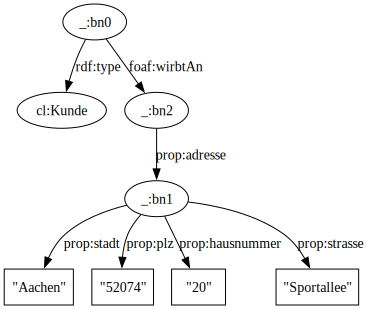

In [11]:
%%rdf turtle -l bnodes
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix cl: <http://example.org/classes#> .
@prefix prop: <http://example.org/properties#> .

# IHR CODE HIER
[ 
    rdf:type cl:Kunde ;
    foaf:wirbtAn [
        prop:adresse [
            prop:strasse "Sportallee" ;
            prop:hausnummer "20" ;
            prop:plz "52074" ;
            prop:stadt "Aachen" 
        ] 
    ] 
] .

In [12]:
# Autograder check

In [13]:
# Autograder check

In [14]:
# Autograder check

<div class="pull-left">
    <br>
    <h2> Aufgabe 9.2 (RDF Datenmodell 2)</h2>
</div>

<div class="pull-right">
    <h3> (4 Punkte) </h3>
</div>

<div class="row"><div class="pull-left"><h2>Teilaufgabe 9.2 a)</h2></div><div class="pull-right"><h3>(2 Punkte)</h3></div></div>

### Gegeben sind die folgenden Informationen:

Es gibt einen <b>Basketballspieler (#1)</b> mit dem englischen Namen <b>Michael Jordan</b> und es gibt einen zweiten <b>Basketballspieler (#2)</b> mit dem englischen Namen <b>LeBron James</b>. <br>
Der erste Spieler ist <b>1963 geboren</b> und hat seine Karriere <b>2003 beendet</b>. Er ist bekannt unter dem Spitznamen <b>"His Airness"</b>. Wichtig: Spitznamen sind nicht auf eine bestimmte Sprachen beschränkt.<br>
Der zweite Spieler ist <b>1984 geboren</b> und spielt immer noch. Er ist bekannt als unter dem Spitznamen <b>"King James"</b>.<br>
Was viele nicht wissen, ist, dass dieser zweite Spieler sich sehr für <b>soziale Gerechtigkeit</b> einsetzt.<br>
Beide Spieler sind (type) <b>Superstars</b> und beide sprechen als <b>Muttersprache Englisch</b>.

<b> Modellieren Sie die o.g. Informationen mit dem folgenden RDF/Turtle Vokabular: </b> 

* ex:Spieler1
* ex:Spieler2
* ex:name
* rdf:type
* ex:geborenImJahr
* ex:karriereBeendetImJahr
* ex:spitzname
* ex:mutterSprache
* ex:setztSichEinFür
* ex:Superstar
* ex:SozialeGerechtigkeit
* ex:Englisch

<b> Beachten Sie, dass Sie für die Lösung dieser Aufgabe nur dieses Vokabular brauchen. </b> <br> 
<b> Nutzen Sie in dieser Aufgabe die vordefinierten CURIEs. Definieren Sie alle Namen mit englischem Sprach-Tag.</b> 

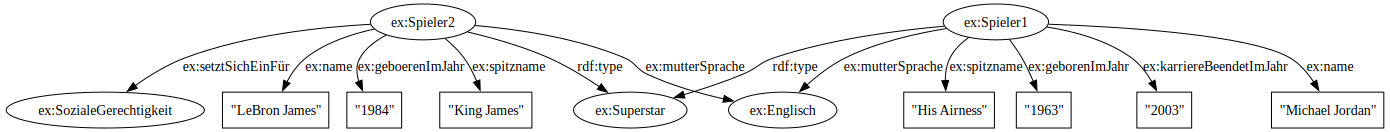

In [48]:
%%rdf turtle -l basketball
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#>.
@prefix ex: <http://example.org/basketballspieler/> .

# IHR CODE HIER
ex:Spieler1 ex:name "Michael Jordan" .
ex:Spieler2 ex:name "LeBron James" .
ex:Spieler1 ex:geborenImJahr "1963" .
ex:Spieler1 ex:karriereBeendetImJahr "2003" .
ex:Spieler1 ex:spitzname "His Airness" .
ex:Spieler2 ex:geboerenImJahr "1984" .
ex:Spieler2 ex:spitzname "King James" .
ex:Spieler2 ex:setztSichEinFür ex:SozialeGerechtigkeit .
ex:Spieler1 rdf:type ex:Superstar .
ex:Spieler2 rdf:type ex:Superstar .
ex:Spieler1 ex:mutterSprache ex:Englisch .
ex:Spieler2 ex:mutterSprache ex:Englisch .



In [46]:
# Autograder check

<div class="row"><div class="pull-left"><h2>Teilaufgabe 9.2 b)</h2></div><div class="pull-right"><h3>(2 Punkte)</h3></div></div>

### Die Reifikation/"Verdinglichung":

Das Hinzufügen von Fakten zu einem Graphen ist sehr einfach, aber was ist, wenn wir eine Aussage hinzufügen möchten, die möglicherweise nicht wahr ist? Dazu müssen wir ein Tripel als ein Objekt selbst behandeln. Wenn zum Beispiel **der Butler den Gärtner beschuldigt, der Mörder zu sein**, können wir **nicht** einfach den Fakt hinzufügen:

ex:Gardener a ex:Murderer .

da wir nicht wissen, ob der Butler die Wahrheit sagt und wir bei einem RDF Graphen annehmen, dass die Aussagen die Wirklichkeit abbilden. Aber wir können dieses Tripel reifizieren, um es zu einer Aussage zu machen, die der Butler gesagt hat.
Dies erreichen wir wenn wir das Vokabular **rdf:subject, rdf:predicate, rdf:object** und die Klasse **rdf:Statement** verwenden.
Die Aussage des Butlers würden wir dann wie folgt modellieren:

<b> ex:Butler ex:sagt \[<br>
&nbsp;&nbsp;&nbsp;&nbsp;rdf:subject ex:Gärtner ;<br>
&nbsp;&nbsp;&nbsp;&nbsp;rdf:predicate rdf:type ;<br>
&nbsp;&nbsp;&nbsp;&nbsp;rdf:object ex:Mörder ;<br>
&nbsp;&nbsp;&nbsp;&nbsp;a rdf:Statement ; <br>
] .

**Hinweis:** Im RDF-Datenmodell sind `rdf:type` und `a` funktional gleichwertig. Beide dienen dazu, den Typ einer Ressource zu spezifizieren. `a` ist lediglich eine Abkürzung für `rdf:type` in der kompakten Turtle-Syntax. Daher kann man sie in RDF-Dokumenten austauschbar verwenden, ohne dass sich die Bedeutung ändert.

Hier zwei Beispiele wie man eine verschachtelte Aussage wie **Terry Pratchett sagte, dass frühere Generationen überzeugt waren, dass ihre wissenschaftlichen Theorien so gut wie perfekt seien**,
 modellieren kann, das object wird in diesem Fall 2-mal durch Blank Nodes ersetzt, wodurch die Verschachtlung des Satzes entsteht:
 
<b> s:terryPratchett p:sagte \[
&nbsp;a rdf:Statement ;
&nbsp;rdf:subject s:frühereGenerationen;
&nbsp;rdf:predicate p:warenÜberzeugt;
&nbsp;rdf:object [
&nbsp; a rdf:Statement ;
&nbsp; rdf:subject s:Theorien;
&nbsp; rdf:predicate p:seien;
&nbsp; rdf:object p:soGutWiePerfekt
] ;
].

**Alternativ:**

<b> s:terryPratchett p:sagte _b:1.

<b>_:b1 a rdf:Statement ;\
    rdf:subject s:frühereGenerationen ;\
    rdf:predicate p:warenÜberzeugt ;\
    rdf:object _:b2 .

<b>_:b2 a rdf:Statement ;\
    rdf:subject s:Theorien ;\
    rdf:predicate p:seien ;\
    rdf:object p:soGutWiePerfekt .

---
    

### Im Folgenden beschäftigen wir uns mit der Modellierung von Aussagen mit dem rdf:Statement. 

Zwei Schauspieler proben für ein Stück, in dem einer den König und der andere den Diener spielt. Nach der Probe sind beide Schauspieler verwirrt.

<font size="3"> <i>  Schauspieler1 dachte, Schauspieler2 hätte gesagt, dass die Rolle des Königs von Schauspieler2 gespielt wird.  </i> </font>

Bitte verwenden Sie folgende Ausdrücke:
* ex:Schauspieler1
* ex:Schauspieler2
* ex:König
* ex:dachte
* ex:sagte
* ex:gespieltVon
* rdf:Statement


<b> Modellieren Sie die kursiv geschriene Aussage mit dem bereitgestellten Vokabular mit rdf:Statement. </b>

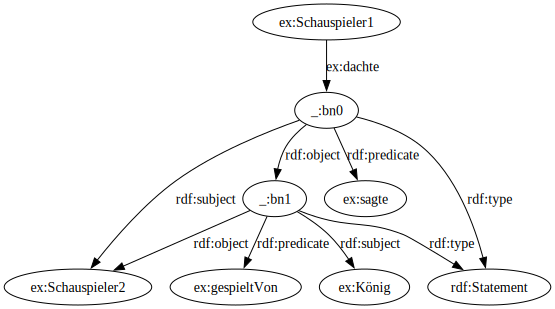

In [49]:
%%rdf turtle -l schauspiel
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix ex: <http://example.org/schauspiel/> .

# IHR CODE HIER
ex:Schauspieler1 ex:dachte [
    rdf:type rdf:Statement ;
    rdf:subject ex:Schauspieler2 ;
    rdf:predicate ex:sagte ;
    rdf:object [
        rdf:type rdf:Statement ;
        rdf:subject ex:König ;
        rdf:predicate ex:gespieltVon ;
        rdf:object ex:Schauspieler2
    ]
] .


In [50]:
# Autograder check

In [51]:
# Autograder check

In [52]:
# Autograder check

<div class="pull-left">
    <br>
    <h2> Aufgabe 9.3 (SPARQL) </h2>
</div>

<div class="pull-right">
    <h3> (6 Punkte) </h3>
</div>

## Tutorial

### SPARQL
SPARQL steht für **S**PARQL **P**rotocol **A**nd **R**DF **Q**uery **L**anguage und ist eine [vom W3C empfohlene](https://www.w3.org/TR/sparql11-overview/) Sprache zur Abfrage und Manipulation von RDF-Grapheninhalten. Da ihre Syntax ähnlich wie die von Turtle ist, werden wir uns zunächst ein Beispiel ansehen:

PREFIX ex: http://example.org/#<br>
SELECT ?countryName ?capitalName
WHERE {
&nbsp;&nbsp;&nbsp;&nbsp;ex:Germany ex:name ?countryName .
&nbsp;&nbsp;&nbsp;&nbsp;ex:Germany ex:capital ?capital .
&nbsp;&nbsp;&nbsp;&nbsp;?capital ex:name ?capitalName
}

Die folgenden Informationen wurden aus der [W3C SPARQL Query Language Specification](https://www.w3.org/TR/2013/REC-sparql11-query-20130321/) entnommen. Wenn Sie Fragen zu SPARQL haben, konsultieren Sie bitte zuerst dieses Dokument.

### Prefixes
Wie in Turtle können wir *Präfixe* definieren, um unsere Abfrage besser lesbar zu machen. In SPARQL beginnen Präfix-Deklarationen mit dem Schlüsselwort **PREFIX** und werden dann von der gewünschten Abkürzung und dann der abzukürzenden IRI gefolgt. Diese Syntax funktioniert auch in Turtle, aber beachten Sie, dass es *keinen Punkt* am Ende der Zeile gibt (im Gegensatz zur *@prefix*-Syntax, die nur in Turtle funktioniert). Im obigen Beispiel kürzen wir den URI http://example.org/# zu *ex:* ab.



### Queries
Nach all unseren Präfix-Deklarationen beginnt die Abfrage. Zuerst müssen wir einen *Abfragetyp* angeben. SPARQL definiert vier Abfragetypen, die alle ein gegebenes Graphenmuster gegen einen RDF-Graphen abgleichen, sich aber darin unterscheiden, was sie zurückgeben:
- **SELECT:** Queries geben die Variablenbindungen von benutzerdefinierten Variablen zurück, die das gegebene Graphenmuster erfüllen.
- **ASK:** Queries geben ein boolesches Ergebnis zurück, basierend darauf, ob das gegebene Graphenmuster mit dem RDF-Graphen abgeglichen werden konnte oder nicht.
- **CONSTRUCT:** Queries geben einen neuen Graphen zurück, der aus einer Vorlage und den Variablenbindungen konstruiert wird, die das angegebene Graphenmuster erfüllen.
- **DESCRIBE:** Queries geben einen RDF-Graphen zurück, der die Ressource auf der Grundlage dessen beschreibt, was der Abfragedienst für wichtig hält (verschiedene Abfragedienste können unterschiedliche Ergebnisse für denselben Graphen liefern).


### Solution Modifiers
SPARQL bietet viele Möglichkeiten, das Ergebnis einer Abfrage zu verändern. Diese werden alle nach dem Pattern-Matching und in der Reihenfolge angewendet, in der sie hier vorgestellt werden.

### ORDER BY

```
SELECT ?employee WHERE {
    ?employee a c:Employee .
    ?employee p:income ?income
}
ORDER BY DESC(?income)
```

Der Modifikator **ORDER BY** kann verwendet werden, um die Bindungen nach einer bestimmten Variablen zu sortieren. Im obigen Beispiel werden alle Mitarbeiter absteigend nach Einkommen sortiert. Um stattdessen aufsteigend zu sortieren, verwenden Sie entweder **ASC** anstelle von **DESC** oder lassen DESC einfach weg, da ASC der Standard ist. Wenn Sie kein ORDER BY verwenden, stehen die Ergebnisse in keiner bestimmten Reihenfolge und können von Dienst zu Dienst variieren.

### DISTINCT

```
SELECT DISTINCT ?parent WHERE {
 ?parent p:child ?child .
}
```
Der Modifikator **DISTINCT** kann verwendet werden, um doppelte Bindungen zu eliminieren. Das obige Beispiel zeigt alle Eltern mit mindestens einem Kind, aber es zeigt alle Eltern nur einmal, auch wenn sie mehrere Kinder haben. Beachten Sie, dass DISTINCT nur auf projizierte Variablen schaut.

### OFFSET

```
SELECT ?employee WHERE {
 ?employee a c:Employee .
}
OFFSET 3
```

Der Modifikator **OFFSET** überspringt die ersten n>=0 Ergebnisse. Im obigen Beispiel werden alle Mitarbeiter angezeigt, aber die ersten 3 übersprungen. OFFSET macht nichts für n=0. OFFSET wird oft mit ORDER BY und LIMIT kombiniert, um vorhersehbare Ergebnisse zu erhalten (z.B. die 3 Mitarbeiter mit dem höchsten Einkommen auslassen).

### LIMIT

```
SELECT ?employee WHERE {
    ?employee a c:Employee .
}
LIMIT 3
```
Der Modifikator **LIMIT** legt eine Obergrenze n>=0 für die Anzahl der zurückgegebenen Lösungen fest. Im obigen Beispiel werden nur die ersten drei Mitarbeiter angezeigt. Für n=0 werden keine Ergebnisse zurückgegeben. LIMIT wird oft mit ORDER BY und OFFSET kombiniert, um vorhersehbare Ergebnisse zu erhalten (z. B. nur die 3 Mitarbeiter mit dem höchsten Einkommen anzeigen).

### MINUS

```
SELECT ?parent WHERE {
?parent p:child ?child .
MINUS {
    ?parent a c:Employee .
    }
}
```

Der Modifikator **MINUS** kann verwendet werden, um von der ausgewählten Menge, Bedingungen abzuziehen. Das obige Beispiel zeigt alle Eltern, mit mindestens einem Kind , welche aber kein Mitarbeiter sind.

### UNION

```
SELECT ?person WHERE {
{
    ?person p:child ?child .
} UNION {
    ?person a c:Employee .
}
}
```

Der Modifikator **UNION** kann verwendet werden, um mehrere Mengen miteinander zu vereinen. Das obige Beispiel zeigt alle Personen, mit mindestens einem Kind haben und alle Personen, die ein Mitarbeiter sind. Beachten Sie, dass dadurch es auch vorkommen kann, dass mehrmals dieselbe Person ausgeben wird.

### FILTER

```
SELECT ?person WHERE {
    ?person p:income ?income .
    ex:Simon p:income ?income2 .
    FILTER (?income2 != ?income)
}
```

Der Modifikator **FILTER** kann verwendet werden, um nach gewissen Kriterien zu filtern. Dabei können die Operatoren ==, != dazu verwendet werden, Variablen zu vergleichen und diese so zu filtern. Das obige Beispiel zeigt alle Personen, die nicht dasselbe income, wie Simon haben.

<div class="row"><div class="pull-left"><h2>RDF-Graph </h2></div></div>

Ein Teil des Katalogs einer Bibliothek wurde als RDF-Modell archiviert. Sie werden nun beauftragt, die Archive nach Informationen zu durchsuchen. 

Im RDF-Modell sind wir Autoren, Bücher und einige Eigenschaften modelliert. Autoren ```(c:Autor)``` besitzen einen Namen, während Bücher ```(c:Buch)``` eine Seitenzahl ```(p:seitenzahl)```, ein Genre ```(p:genre)```, den Autor ```(p:autor)```, der sie verfasst hat, ihren Titel ```(p:titel)``` und ihr Erscheinungsjahr ```(p:erscheinungsjahr)``` als Eigenschaft haben :


<div class="alert alert-info">
    <b> WICHTIG: </b> <br>
    Sie müssen die folgende Zelle ausführen, da der Graph sonst für die folgenden Aufgaben nicht angesprochen werden kann.
    Für die Bearbeitung der Queries brauchen Sie NUR die folgenden Prefixe. Definieren Sie sich keine neuen Präfixe. Andere Präfixes führen automatisch zu 0 Punkten.
    Für Sie die nächste Zelle aus um die Präfixes benutzen zu können.
    </div>

In [53]:
%%rdf sparql --prefix
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX s: <http://example.org/subjekt#>
PREFIX p: <http://example.org/eigenschaften#>
PREFIX c: <http://example.org/klassen#>

SPARQL: Stored prefix.


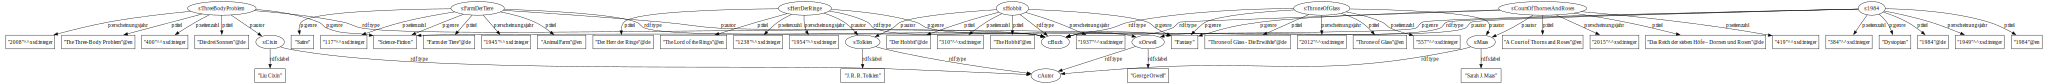

In [57]:
%%rdf turtle -l bücher
@prefix c: <http://example.org/klassen#> .
@prefix p: <http://example.org/eigenschaften#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix s: <http://example.org/subjekt#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

s:Tolkien a c:Autor ;
    rdfs:label "J. R. R. Tolkien" .
    
s:Orwell a c:Autor ;
    rdfs:label "George Orwell" .
    
s:Maas a c:Autor;
    rdfs:label "Sarah J. Maas" .

s:Cixin a c:Autor ;
    rdfs:label "Liu Cixin" .

s:Hobbit a c:Buch ;
    p:seitenzahl       "310"^^xsd:integer  ;
    p:genre            "Fantasy";
    p:autor             s:Tolkien;
    p:titel            "Der Hobbit"@de,
                       "The Hobbit"@en ;
    p:erscheinungsjahr "1937"^^xsd:integer  . 
    
s:HerrDerRinge a c:Buch ;
    p:seitenzahl       "1238"^^xsd:integer  ;
    p:genre            "Fantasy";
    p:autor             s:Tolkien;
    p:titel            "Der Herr der Ringe"@de,
                       "The Lord of the Rings"@en ;
    p:erscheinungsjahr "1954"^^xsd:integer  . 
   
s:FarmDerTiere a c:Buch ;
    p:seitenzahl       "117"^^xsd:integer  ;
    p:genre            "Science-Fiction",
                       "Satire";
    p:autor             s:Orwell;
    p:titel            "Farm der Tiere"@de,
                       "Animal Farm"@en ;
    p:erscheinungsjahr "1945"^^xsd:integer  .     

s:1984 a c:Buch ;
    p:seitenzahl       "384"^^xsd:integer  ;
    p:genre            "Science-Fiction",
                       "Dystopian" ;
    p:autor             s:Orwell;
    p:titel            "1984"@de,
                       "1984"@en ;
    p:erscheinungsjahr "1949"^^xsd:integer  . 
    
s:ThroneOfGlass a c:Buch ;
    p:seitenzahl       "557"^^xsd:integer  ;
    p:genre            "Fantasy";
    p:autor             s:Maas;
    p:titel            "Throne of Glass - Die Erwählte"@de,
                       "Throne of Glass"@en ;
    p:erscheinungsjahr "2012"^^xsd:integer  .

s:CourtOfThornesAndRoses a c:Buch ;
    p:seitenzahl       "419"^^xsd:integer  ;
    p:genre            "Fantasy";
    p:autor             s:Maas;
    p:titel            "Das Reich der sieben Höfe – Dornen und Rosen"@de,
                       "A Court of Thorns and Roses"@en ;
    p:erscheinungsjahr "2015"^^xsd:integer  .

s:ThreeBodyProblem a c:Buch ;
    p:seitenzahl       "400"^^xsd:integer  ;
    p:genre            "Science-Fiction";
    p:autor             s:Cixin;
    p:titel            "Die drei Sonnen"@de,
                       "The Three-Body Problem"@en ;
    p:erscheinungsjahr "2008"^^xsd:integer  . 

    

            

### Beispiel
Um die URI des Autors von Herr der Ringe zu erfragen, müssen Sie lediglich die folgende Anfrage starten:

In [55]:
%%rdf sparql -l bücher -s test 
SELECT ?ergebnis
WHERE {
    s:HerrDerRinge p:autor ?ergebnis
}

<b>Schreiben Sie eine geeignete SPARQL Query für jede unter der Teilaufgabe genannten Anforderung. Vermeiden Sie dabei redundante Angaben.

<div class="alert alert-danger">
    <b> WICHTIG: </b> <br>
    Benutzen Sie für die Lösung der Aufgaben nur die in der Beschreibung angegebene[n] SELECT Variable[n] zum selektieren eines Ergebnisses. <br>
    Wenn als SELECT Variable beispielsweise <b>?ergebnis</b> angegeben ist, dann benutzen Sie bitte: <b>SELECT ?ergebnis WHERE {.....}</b> <br>
    Sollten sie nicht die vorgegebene Variable verwenden, wird die Lösung mit 0 Punkten bewertet, selbst wenn ihr Ergebnis richtig ist.
    </div>

<div class="row"><div class="pull-left"><h2>Teilaufgabe 9.3 a)</h2></div><div class="pull-right"><h3>(1 Punkt)</h3></div></div>

<b><br>Geben Sie ohne Duplikate die URIs aller Autoren von Büchern des Science-Fiction-Genres aus.</b><br>
    
Verwenden Sie als **SELECT Variable: ?ergebnis**

**Tipp:** Verwenden Sie DISTINCT

In [61]:
%%rdf sparql -l bücher -s 3a
# IHR CODE HIER
SELECT DISTINCT ?ergebnis
WHERE {
    ?buch p:genre "Science-Fiction" .
    ?buch p:autor ?ergebnis .
}

In [62]:
# Autograder check

<div class="row"><div class="pull-left"><h2>Teilaufgabe 9.3 b)</h2></div><div class="pull-right"><h3>(1 Punkt)</h3></div></div>


<b><br>Geben Sie die URI und das Erscheinungsjahr aller Bücher an, die vor dem Jahr 2000 veröffentlicht wurden und nicht von Tolkien geschrieben wurden.</b><br>

Verwenden Sie als **SELECT Variable: ?ergebnis ?erscheinungsjahr**<br>
**Tipp:** Verwenden Sie Filtermethode **FILTER (X < Y)** und entweder **MINUS** oder **FILTER (X!=Y)**.

In [81]:
%%rdf sparql -l bücher -s 3b
# IHR CODE HIER
SELECT ?ergebnis ?erscheinungsjahr 
WHERE {
    ?ergebnis p:erscheinungsjahr ?erscheinungsjahr .
    ?ergebnis p:autor ?autor .
    FILTER(?autor != 'Tolkien' && ?erscheinungsjahr < 2000)
}

In [66]:
# Autograder check

<div class="row"><div class="pull-left"><h2>Teilaufgabe 9.3 c)</h2></div><div class="pull-right"><h3>(2 Punkt)</h3></div></div>


<b><br>Geben Sie den englischen Titel aller Bücher des Fantasy-Genres und deren Seitenzahl an. Ordnen Sie die Ergebnisse absteigend nach Seitenzahl.</b><br>

Verwenden Sie als **SELECT Variable: ?ergebnis ?seitenzahl**<br>
**Tipp:** Verwenden Sie Filtermethode **FILTER (X = Y)**. 

Die Funktion **lang(Z)** gibt den Sprach-Tag von Z aus, der Sprach-Tag für englisch ist "en", wenn Z keinen Sprach-Tag hat wird "" zurück gegeben.

In [73]:
%%rdf sparql -l bücher -s 3c
# IHR CODE HIER
SELECT ?ergebnis ?seitenzahl
WHERE {
    ?ergebnis p:genre "Fantasy" .
    ?ergebnis p:titel ?titel .
    ?ergebnis p:seitenzahl ?seitenzahl .
    FILTER(lang(?titel)="en")
} ORDER BY DESC(?seitenzahl)

<div class="row"><div class="pull-left"><h2>Teilaufgabe 9.3 d)</h2></div><div class="pull-right"><h3>(2 Punkt)</h3></div></div>

<b><br>Bitte geben Sie die Titel aller deutschen und englischen Bücher, die von J. R. R. Tolkien oder Liu Cixin verfasst wurden, zusammen mit ihrem Genre an.</b><br>

Verwenden Sie als **SELECT Variable: ?ergebnis ?genre**<br>
Tipp: Verwenden Sie UNION.

In [89]:
%%rdf sparql -l bücher -s 3d
# IHR CODE HIER
SELECT ?ergebnis ?genre
WHERE {
        ?buch p:titel ?ergebnis .
        ?buch p:genre ?genre .
        ?buch p:autor ?autor .
        FILTER((?autor = s:Tolkien || ?autor = s:Cixin) && (lang(?ergebnis) = "en" || lang(?ergebnis) = "de"))
}

<div class="pull-left">
    <br>
    <h2> Aufgabe 9.4 (RDF Graph) </h2>
</div>

<div class="pull-right">
    <h3> (5 Punkte) </h3>
</div>

Eine berühmte Fernsehserie hatte in der Vergangenheit das Problem, dass die Zuschauer die komplexen Familienbeziehungen und Erbfolgen nicht nachvollziehen konnten. Sie wurden beauftragt, die Familienbeziehungen als RDF Schema zu modellieren. Zudem möchten sie die Daten der Charaktere im Modell integrieren.

Es sind folgende Familienbeziehungen bekannt:

Ned Stark ist der Vater von Robb, Sansa, Arya, Bran und Rickon.\
Catelyn Stark ist die Mutter von Robb, Sansa, Arya, Bran und Rickon.\
Tywin Lannister ist der Vater von Jaime, Cersei und Tyrion.\
Joanna Lannister ist die Mutter von Jaime, Cersei und Tyrion.


**Folgende Daten sind über die Personen bekannt:**

Die Starks wohnen in Winterfell.
Die Lannisters wohnen in Casterly Rock.

<b> Modellieren Sie ein RDF Schema, welches den Sachverhalt wiedergibt. Verwenden Sie dazu nur Strings oder das folgende Vokabular: </b>

* ex:NedStark
* ex:CatelynStark
* ex:RobbStark
* ex:SansaStark
* ex:AryaStark
* ex:BranStark
* ex:RickonStark
* ex:TywinLannister
* ex:JoannaLannister
* ex:JaimeLannister
* ex:CerseiLannister
* ex:TyrionLannister
* ex:wohntIn
* ex:kindVon
* ex:Winterfell
* ex:CasterlyRock

Anmerkung: Falls Person X das Kind von Person Y ist, gilt: ex:X ex:kindVon ex:Y.

In [30]:
%%rdf turtle -l gameofthrones
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix ex: <http://example.org/got/> .


# IHR CODE HIER
raise NotImplementedError()

Could not parse turtle graph:<br>at line 7 of <>:
Bad syntax (expected directive or statement) at ^ in:
"...b'.\n@prefix ex: <http://example.org/got/> .\n\n\n# IHR CODE HIER\n'^b'raise NotImplementedError()\n'"
Turtle: Parse failed:


In [31]:
# Autograder check
